<a href="https://colab.research.google.com/github/BhaveshWadibhasme/Explainable_AI/blob/master/Wine_Variety_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.2MB/s 
     |████████████████████████████████| 276kB 5.7MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 174kB 8.1MB/s 
     |████████████████████████████████| 14.2MB 287kB/s 
     |████████████████████████████████| 6.8MB 53.3MB/s 
     |████████████████████████████████| 245kB 42.6MB/s 
     |████████████████████████████████| 112kB 44.4MB/s 
     |████████████████████████████████| 1.4MB 34.2MB/s 
     |████████████████████████████████| 2.0MB 51.1MB/s 
     |████████████████████████████████| 1.7MB 45.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 46.7MB/s 
     |████████████████████████████████| 163kB 45.6MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df  = pd.read_csv("/content/Wine.csv")
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Here the first column is target column and rest of other are independant variables. Looking at the dataset it looks like all the variables are numeric. Lets do that check in the next code block.

In [5]:
#-------Check_for_dataset_information_about_each_column------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


Looking at the above result it looks like out gussing was correct. All the independant varibales are numeric. Now lets check out second criterion of missing values. In the next block of code we will check whether there is any missing values in the dataset.

In [6]:
df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64


Above putput shows that there is no missing values in the dataset. As there is no missing values in the given dataset, missing values treatment is not required here. Lets move to our next check of imbalance testing. In imbalance check we will test whether out dataset carrying any imbalance or not. Linear machine learning model are sensitive to imbalance datasets and performs poorly on such datasets. So to test class imbalance we will be using countplot from seaborn library.

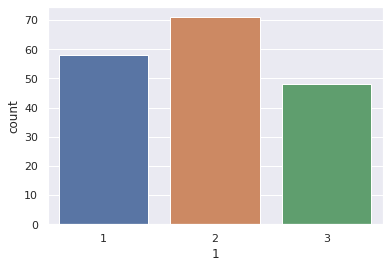

In [7]:
sns.countplot(df['1'])

Looking at the above graph we can conclude that there is no such imbalance in the dataset. All the three population are not exactly same but it is okay according to defination of imbalance dataset in machine learning.

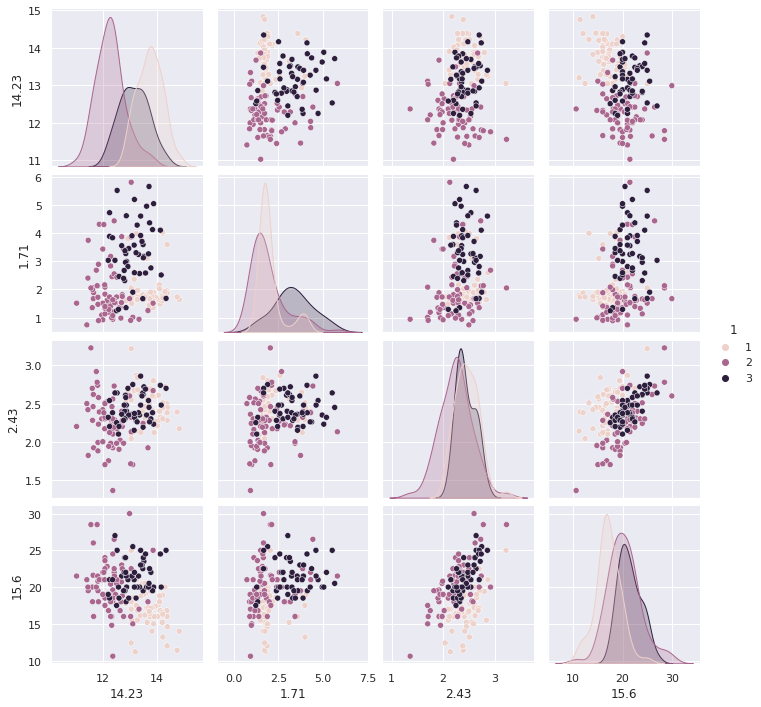

In [8]:
#-------Check_distribution_of_each_independant_variable----------
sns.pairplot(df.iloc[:,0:5],hue = '1')

Looking at the above pairplot we can conclude that the is difference in the distribution in examples belongs to different classes. It shows that for many of the feature different class labels examples centriods are differing from each other. Which is sign of having variation/differentiaion in character between innter class label examples.

In [9]:
#-------Lets_build_pycaret_model_to_get_idea_about_ML_model-----------------
from pycaret.classification import *

In [10]:
model = setup(df,target = "1")

,Description,Value
0,session_id,5184
1,Target,1
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2"
4,Original Data,"(177, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
#--------------Compare_models_using_pycaret------------
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9923,1.0000,0.9933,0.9938,0.9923,0.9885,0.9893,0.017
ridge,Ridge Classifier,0.9917,0.0000,0.9933,0.9933,0.9917,0.9874,0.9883,0.015
et,Extra Trees Classifier,0.9917,1.0000,0.9933,0.9933,0.9917,0.9874,0.9883,0.463
qda,Quadratic Discriminant Analysis,0.9833,1.0000,0.9833,0.9861,0.9829,0.9742,0.9761,0.018
lightgbm,Light Gradient Boosting Machine,0.9673,1.0000,0.9733,0.9747,0.9676,0.9509,0.9544,0.099
rf,Random Forest Classifier,0.9667,0.9988,0.9717,0.9743,0.9662,0.9497,0.9538,0.467
nb,Naive Bayes,0.9590,0.9932,0.9633,0.9670,0.9579,0.9376,0.9414,0.016
lr,Logistic Regression,0.9340,0.9934,0.9433,0.9445,0.9327,0.9006,0.9072,0.557
ada,Ada Boost Classifier,0.9269,0.9775,0.9217,0.9393,0.9247,0.8880,0.8961,0.099
gbc,Gradient Boosting Classifier,0.9103,0.9671,0.9078,0.9250,0.9045,0.8590,0.8702,0.264


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
target = df['1']
df = df.drop('1',axis=1)

In [13]:
#-----------Split_entire_dataset_into_train_and_validation_sets-----------------
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size = 0.20,random_state = 42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(141, 13) (141,) (36, 13) (36,)


In [14]:
#---------pickup_best_performing_model_to_build_ml_model-----------
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(verbose=1)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=1,
                     warm_start=False)

In [15]:
#--------Implement_model_on_validation_dataset------------------
predictions = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [16]:
#---------------Check_model_performance--------------------
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.86      0.92        14
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36

